
# Importing Libraries and Data

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3MB 10.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=5a9984b4609229cca73d50e60c090f504dabbccaae4265640781d05901200c63
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1kpvygz/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import norm, t

# Analysis of the Bovespa Index

In [ ]:
ibov = yf.download('^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov

,Adj Close,retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2021-07-05,126920.000000,-0.005501
2021-07-06,125095.000000,-0.014379
2021-07-07,127019.000000,0.015380


In [ ]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [ ]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {: .2f}%'.format(media_ibov*100))

Retorno médio =  0.15%


In [ ]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.25%


In [ ]:
ibov[ibov['retorno'] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?

In [ ]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000331%


In [ ]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 30228840 dias
Ou uma vez a cada 82818 anos


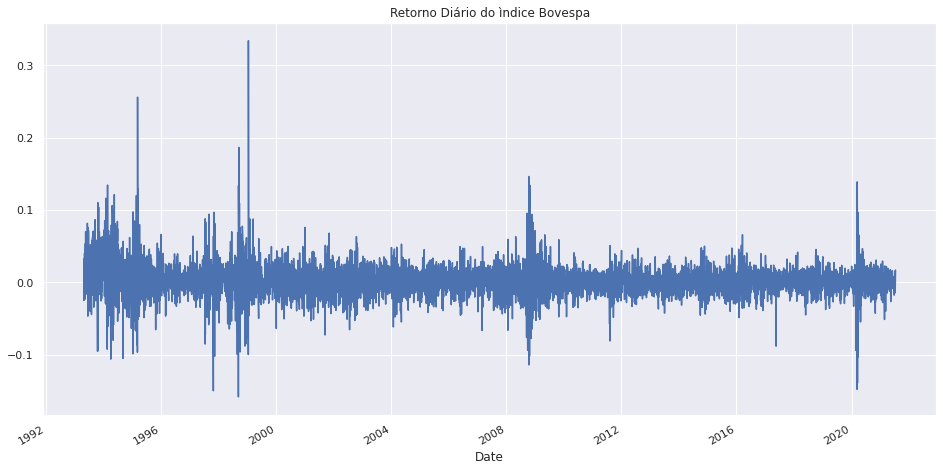

In [ ]:
ibov['retorno'].plot(title='Retorno Diário do ìndice Bovespa')

In [ ]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size, loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

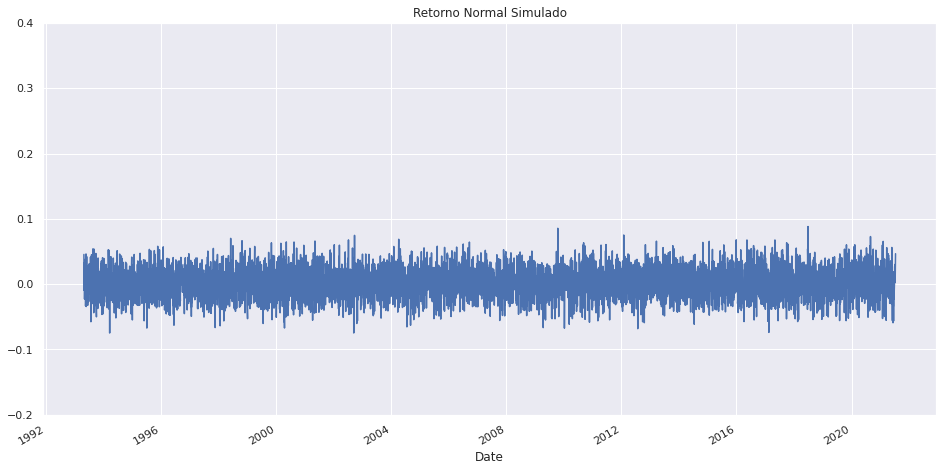

In [ ]:
ax = ibov['retorno_teorico'].plot(title='Retorno Normal Simulado')
ax.set_ylim(-0.2, 0.4)

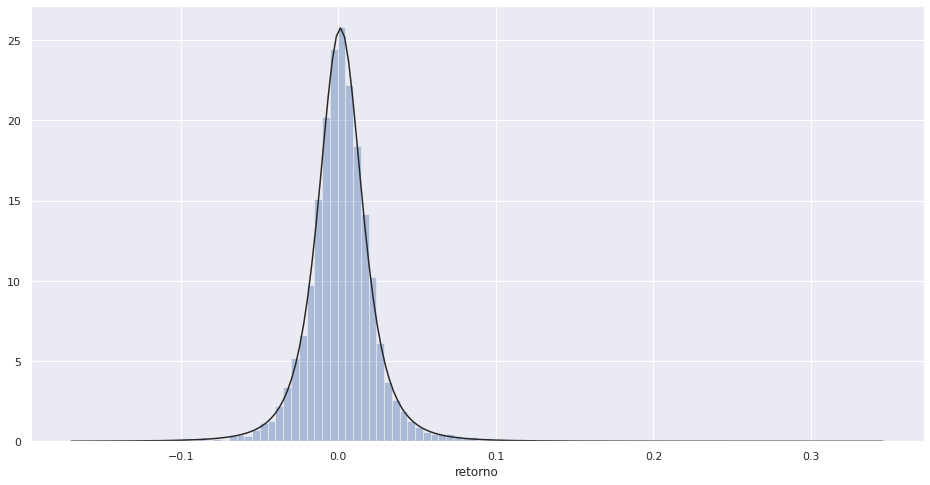

In [ ]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t)

In [ ]:
(graus_de_liberdade, media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Disdribuiçção T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Disdribuiçção T-Student
Graus de liberdade=3.27 
Média=0.0013 
Desvio padrão=0.01436


In [ ]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade, loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12479887%


In [ ]:
frequencia_teorica_t = 1 / probrabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 801 dias
Ou uma vez a cada 3 anos


In [ ]:
frequencia_observada = ibov['retorno'].size / ibov[ibov['retorno'] < -0.12].size
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 464 dias
